# Predicting Future Prices Using Facebook Prophet

### IMPORTING LIBRARIES AND DATASET

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

In [14]:
#dataframe creation for both training and testing
avocado_df=pd.read_csv('avocado.csv')

- Date: the date of the observation
- AveragePrice: the average price of a single avocado
- type: conventional or organic
- year: the year
- Region: the city or region of the observation
- Total Volume: Total number of avocado sold
- 4046: total number of avocado with PLU 4046 sold
- 4225: total number of avocado with PLU 4225 sold
- 4770: total number of avocado with PLU 4770 sold

In [15]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [16]:
avocado_df.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [17]:
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [18]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [19]:
#checking for null values
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### EXPLORING DATASET

In [20]:
avocado_df=avocado_df.sort_values('Date')

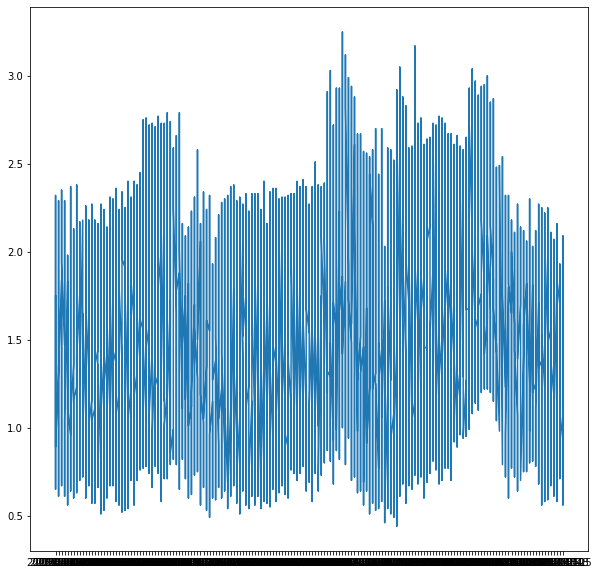

In [21]:
# Plot data and average price
plt.figure(figsize=(10,10))
plt.plot(avocado_df['Date'],avocado_df['AveragePrice'])

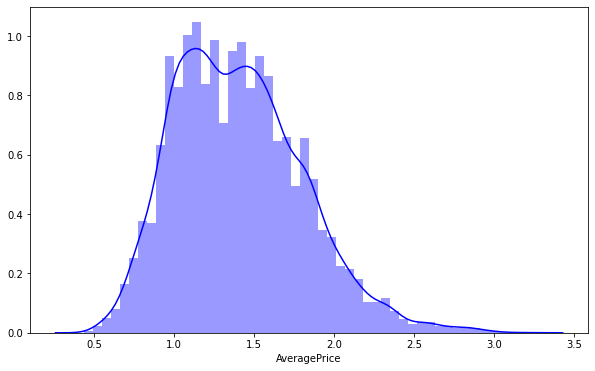

In [22]:
#plot the distribution of average  price
plt.figure(figsize=(10,6))
sns.distplot(avocado_df['AveragePrice'],color='b')

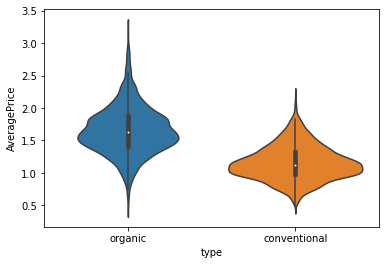

In [23]:
#Plot a violin plot of the average price vs. avocado type
sns.violinplot(y='AveragePrice',x='type',data=avocado_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

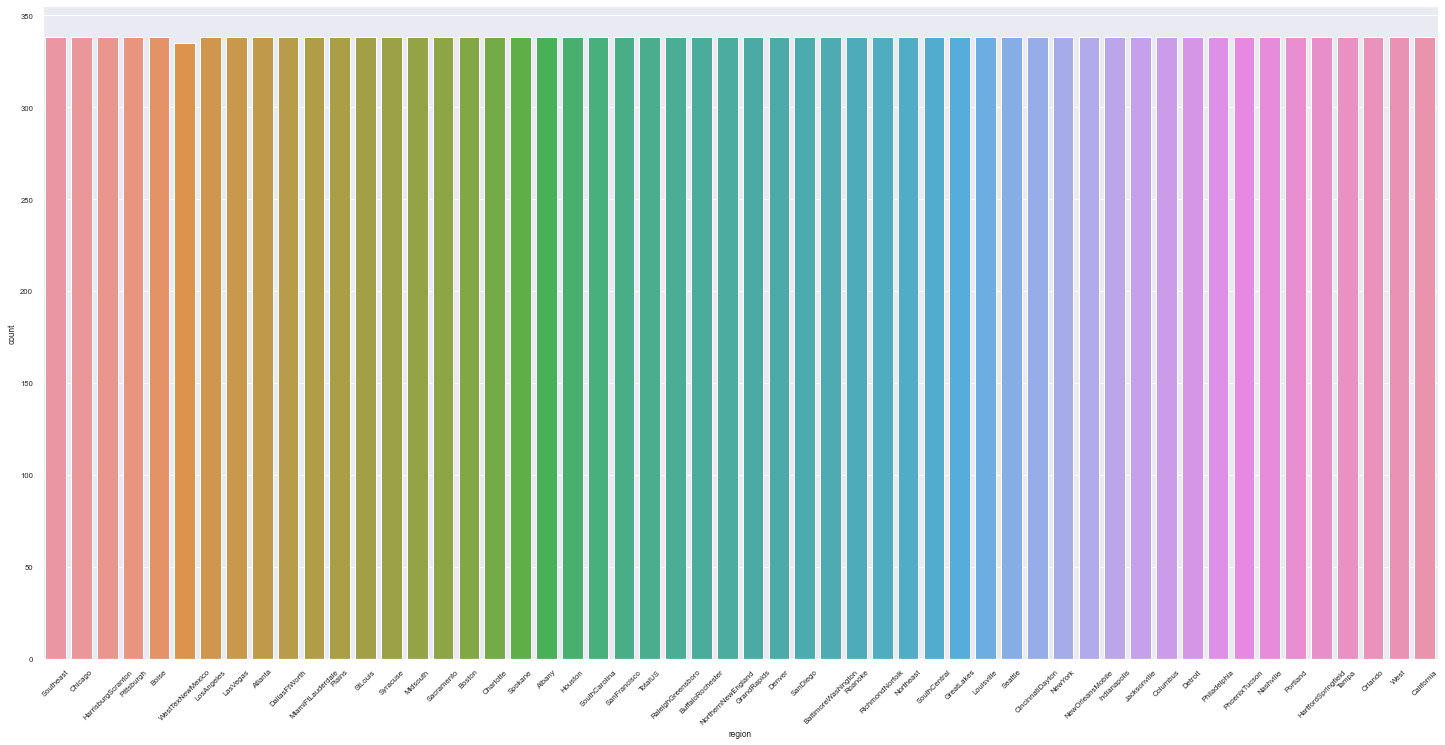

In [24]:
#Bar Chat to indicate the number of regions
sns.set(font_scale=0.7)
plt.figure(figsize=[25,12])
sns.countplot(x='region',data=avocado_df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

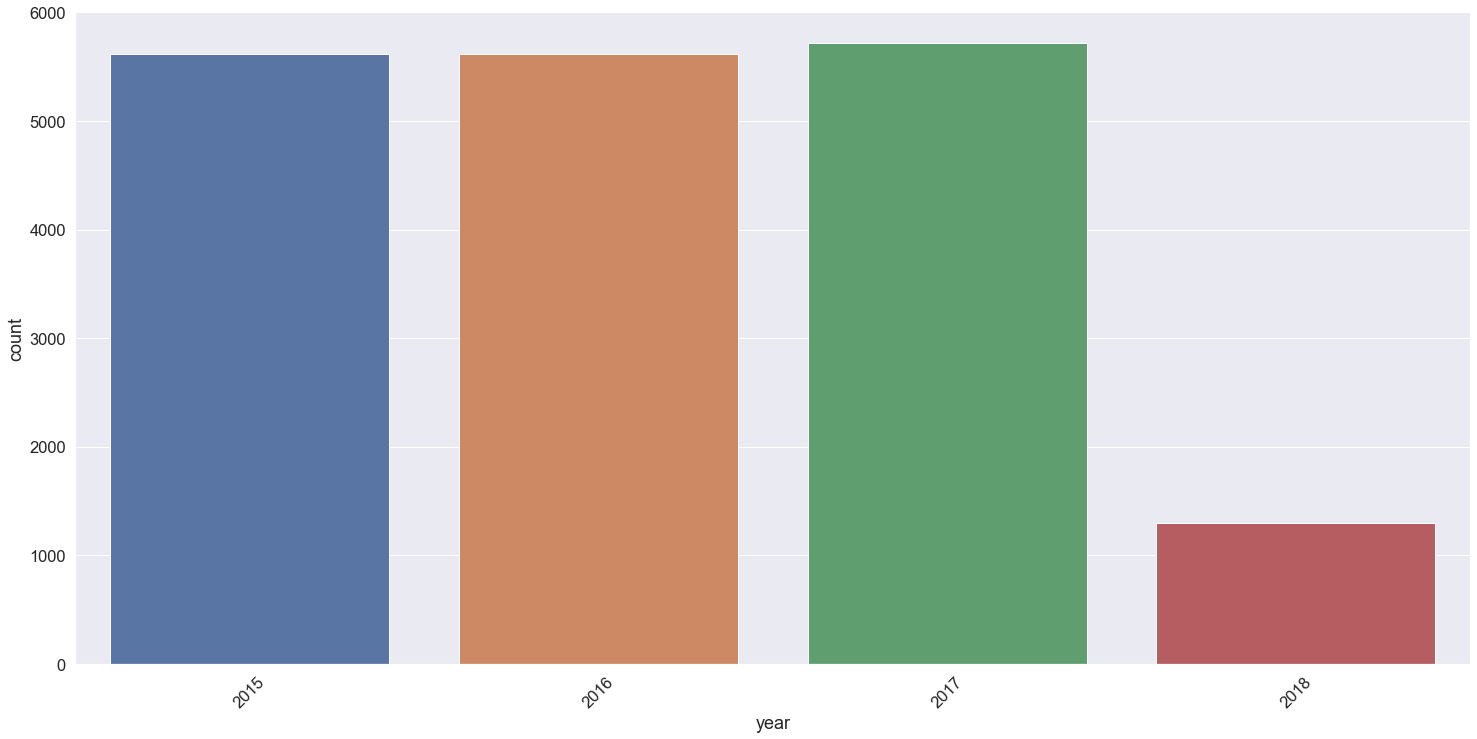

In [25]:
#Bar Chat to indicate the count in year
sns.set(font_scale=1.5)
plt.figure(figsize=[25,12])
sns.countplot(x='year',data=avocado_df)
plt.xticks(rotation=45)

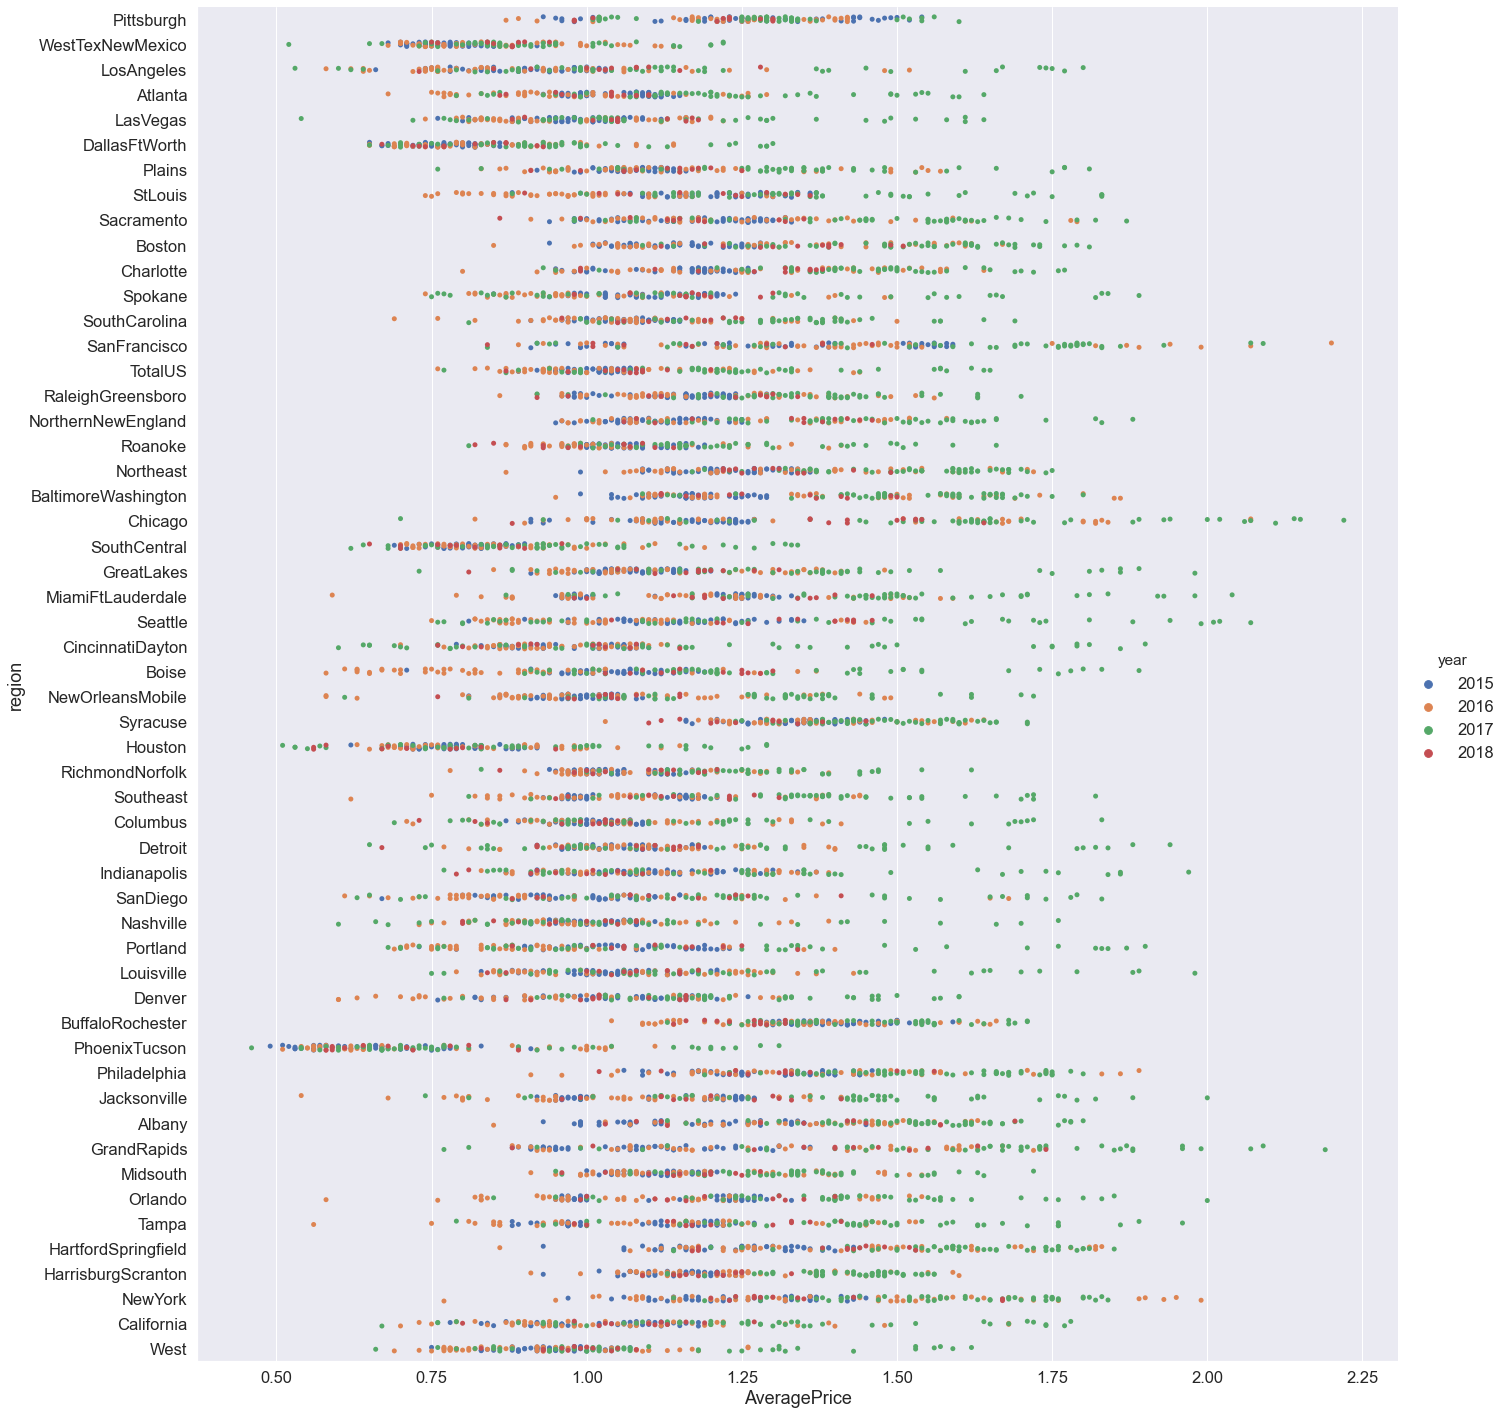

In [36]:
#plot the avocado price vs. region for contentional avocado
conventional=sns.catplot('AveragePrice','region',data=avocado_df[avocado_df['type']=='conventional'],hue='year',height=20)

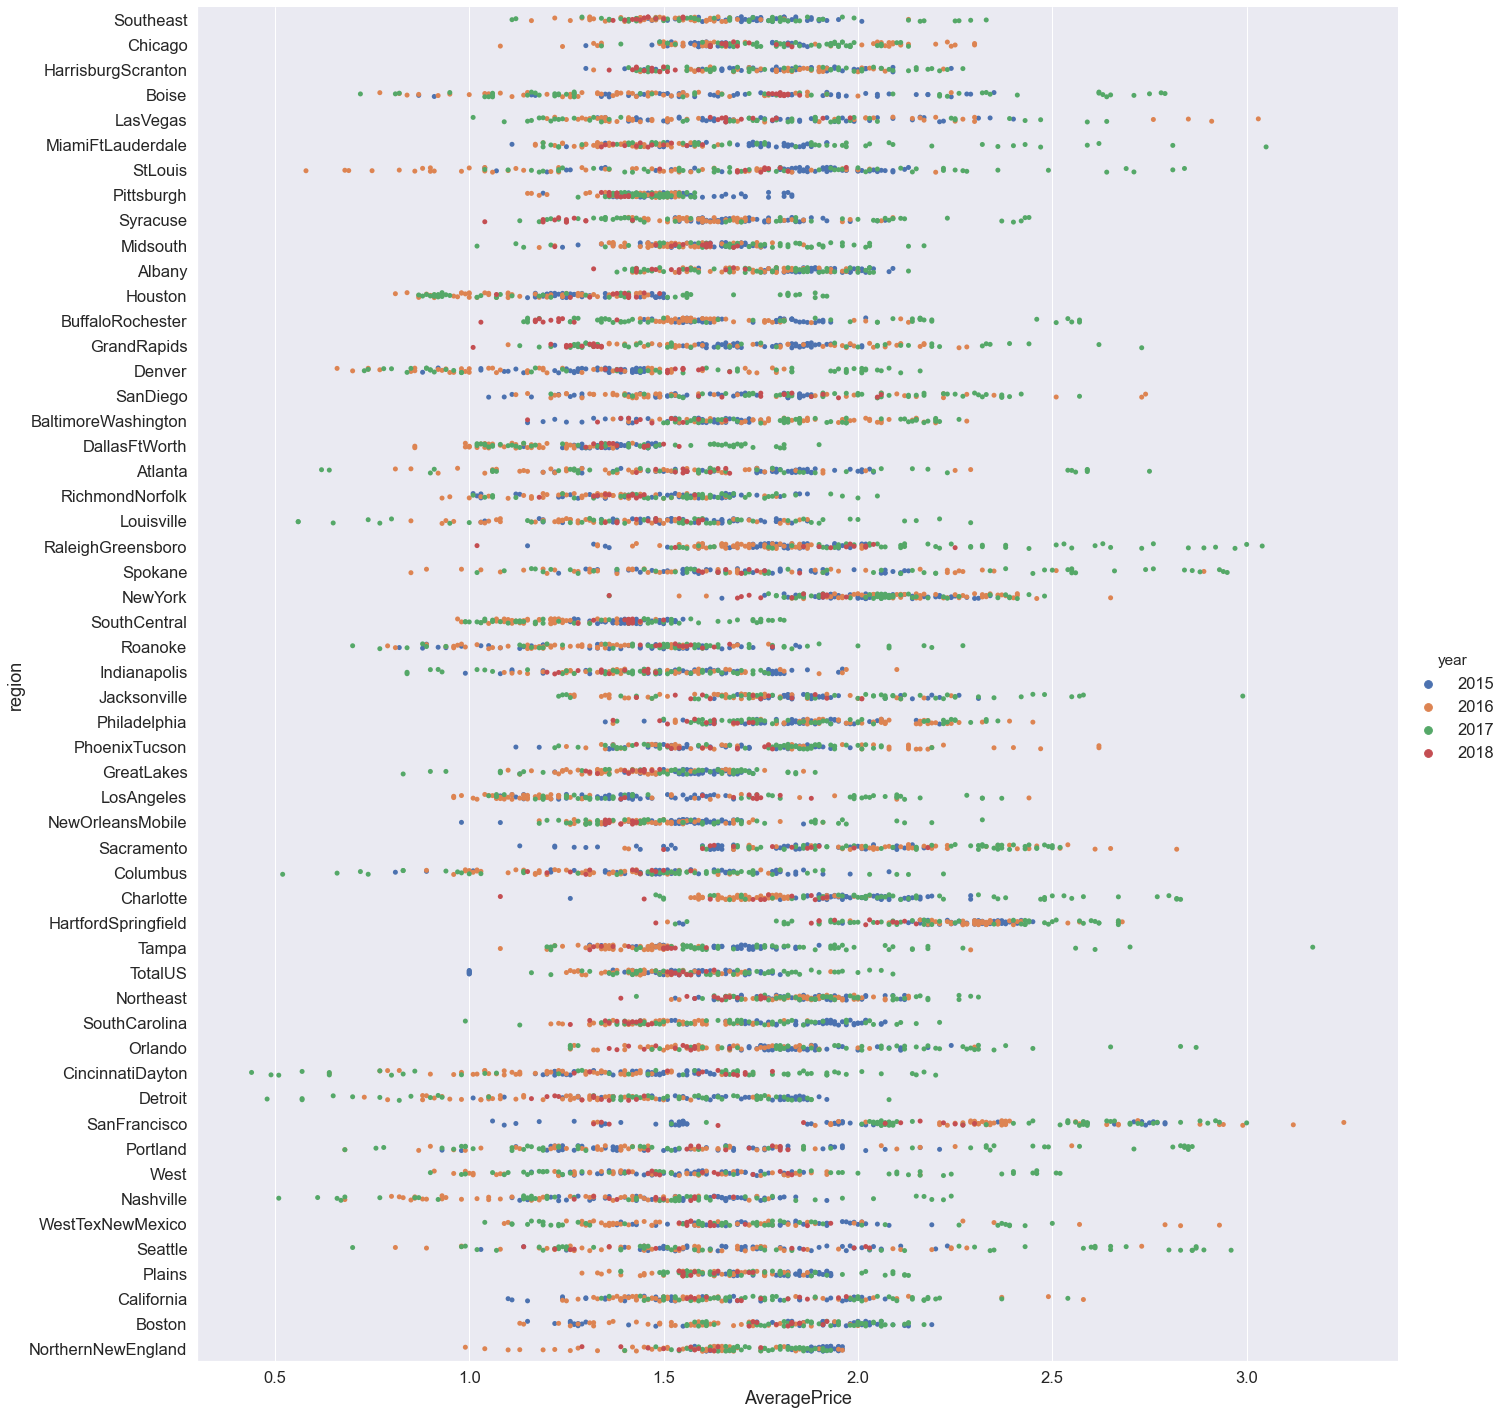

In [37]:
#plot the avocado price vs. region for organic avocado
organic=sns.catplot('AveragePrice','region',data=avocado_df[avocado_df['type']=='organic'],hue='year',height=20)

### PREPARE THE DATA BEFORE APPLYING FACEBOOK PROPHET TOOL

In [38]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
2807,51,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico
1195,51,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,LosAngeles
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.00,organic,2015,LasVegas
103,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
1143,51,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.00,conventional,2015,LasVegas


In [40]:
avocado_prophet_df=avocado_df[['Date','AveragePrice']]

In [42]:
avocado_prophet_df.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [43]:
avocado_prophet_df=avocado_prophet_df.rename(columns={'Date':'ds','AveragePrice':'y'})

In [44]:
avocado_prophet_df.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


### DEVELOP MODEL AND MAKING PREDICTION

In [45]:
m=Prophet()
m.fit(avocado_prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
#Forcasting into the future
future=m.make_future_dataframe(periods=365)
forcast=m.predict(future)

In [50]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498604,0.920264,1.862345,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
1,2015-01-04,1.498604,0.878049,1.862867,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
2,2015-01-04,1.498604,0.939226,1.873859,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
3,2015-01-04,1.498604,0.882376,1.843157,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
4,2015-01-04,1.498604,0.925678,1.875600,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
5,2015-01-04,1.498604,0.908238,1.855209,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
6,2015-01-04,1.498604,0.895902,1.843805,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
7,2015-01-04,1.498604,0.870839,1.844933,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
8,2015-01-04,1.498604,0.860496,1.841231,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
9,2015-01-04,1.498604,0.905869,1.835647,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119


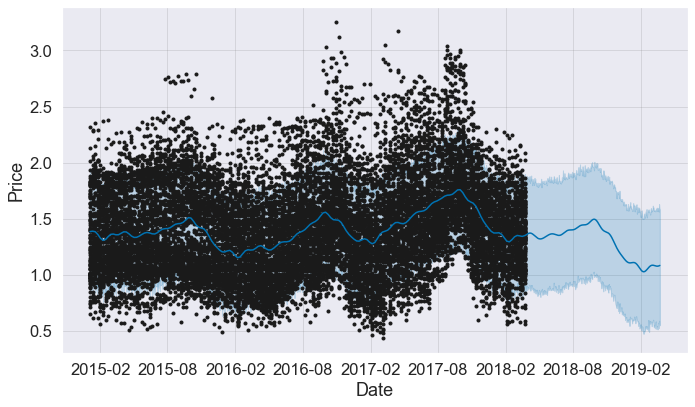

In [51]:
figure=m.plot(forcast,xlabel='Date',ylabel='Price')

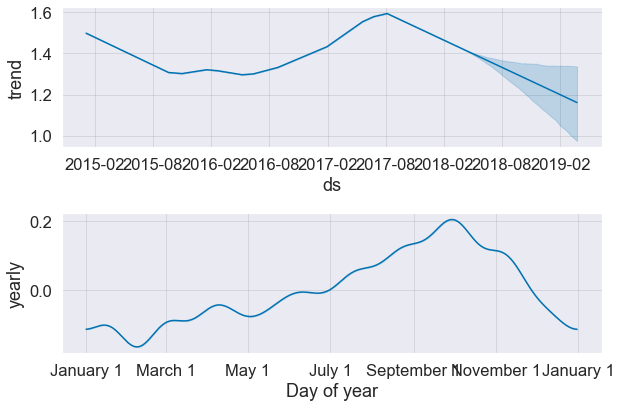

In [52]:
figure2=m.plot_components(forcast)

### DEVELOP MODEL AND MAKE PREDICTION(Region Specific)

In [53]:
avocado_df_again=pd.read_csv('avocado.csv')

In [57]:
avocado_df_sample=avocado_df_again[avocado_df_again['region']=='West']

In [58]:
avocado_df_sample=avocado_df_sample.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


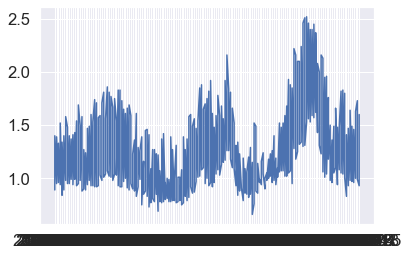

In [59]:
plt.plot(avocado_df_sample['Date'],avocado_df_sample['AveragePrice'])

In [60]:
avocado_df_sample=avocado_df_sample.rename(columns={'Date':'ds','AveragePrice':'y'})

In [61]:
avocado_df_sample

,Unnamed: 0,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
11879,49,2015-01-18,1.33,251749.94,64328.76,147608.30,69.05,39743.83,7442.17,32301.66,0.00,organic,2015,West
2752,48,2015-01-25,0.94,5461313.90,2695157.56,2031937.97,71550.57,662667.80,521877.70,140735.66,54.44,conventional,2015,West
11878,48,2015-01-25,1.52,166494.38,61454.35,68624.86,749.30,35665.87,9756.03,25909.84,0.00,organic,2015,West
2751,47,2015-02-01,0.84,8362504.08,3531350.44,3872672.00,80893.53,877588.11,705333.64,172154.91,99.56,conventional,2015,West
11877,47,2015-02-01,1.34,216484.22,89599.59,82183.07,184.99,44516.57,11083.16,33433.41,0.00,organic,2015,West


In [62]:
m=Prophet()
m.fit(avocado_df_sample)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
future=m.make_future_dataframe(periods=365)
forcast=m.predict(future)

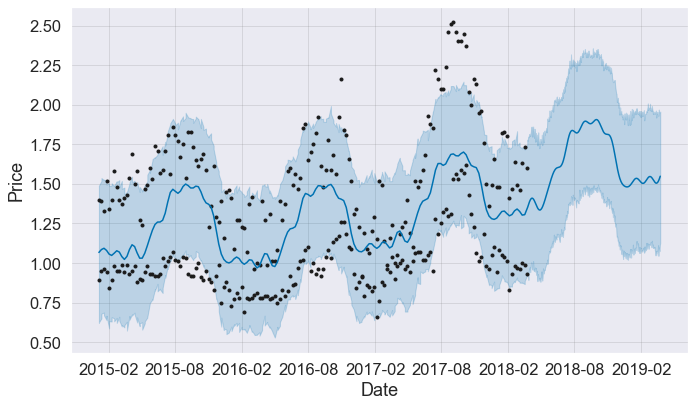

In [64]:
figure=m.plot(forcast,xlabel='Date',ylabel='Price')

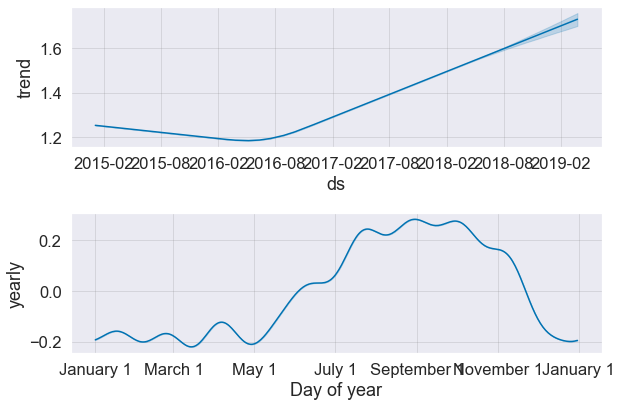

In [65]:
figure3=m.plot_components(forcast)